In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import initial_grid as ig

In [5]:
carmap = ig.initial_grid(4)

In [24]:
def neighbors(carmap, i, j):
    """ x = j
        y = i
    """
    directions = {'n':(i-1,j), 'e':(i,j+1), 'w':(i,j-1), 's':(i+1,j)}
    if i == 0:
        directions['n'] = (i, carmap.shape[0]-1)
    if i == carmap.shape[0]-1:
        directions['s'] = (0,j)
    if j == 0:
        directions['w'] = (i,carmap.shape[1]-1)
    if j == carmap.shape[0]-1:
        directions['e'] = (i,0)
    return directions

In [25]:
neighbors(carmap, 0,15)

{'e': (0, 16), 'n': (0, 14), 's': (1, 15), 'w': (0, 14)}

In [26]:
#direction dictionary is dir_
dir_ = {'n': 2,
        'e': 0,
        's': 3,
        'w': 1}

for d in dir_:
    print(d)

w
s
e
n


In [32]:
def motion(carmap, lim=5):
    cm = carmap
    new_m = np.zeros_like(cm)
    new_m[:] = cm[:]
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            n = neighbors(cm, i, j)
            for k in dir_:
                current = (i,j, dir_[k])
                new = n[k] + tuple([dir_[k]])
                if not cm[current] == 0:
                    cars = cm[current]
                    if cm[new] < lim:
                        move = cars // 2
                        res = lim - cm[new] - move
                        if res < 0:
                            new_m[current] -= lim - move
                            new_m[new] += lim - move
                        else:
                            new_m[current] -= move
                            new_m[new] += move
    return new_m 

In [33]:
def plot(grid, view=[]):
    if not len(view) == 0:
        dir_dict = {'n': 0,
                    'e': 1,
                    'w': 2,
                    's':3}
        f = np.zeros_like(grid[:,:,0])
        for d in view:
            f += grid[:,:,dir_dict[d]]
        plt.imshow(f)
    else:
        plt.imshow(grid.sum(axis=2),cmap='hot')
    plt.colorbar()

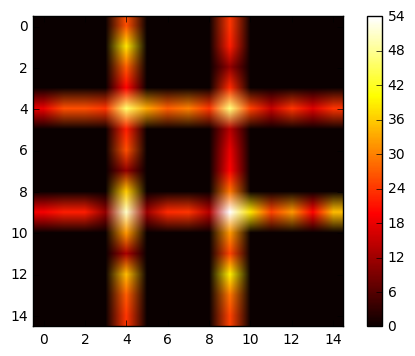

In [34]:
plot(carmap)

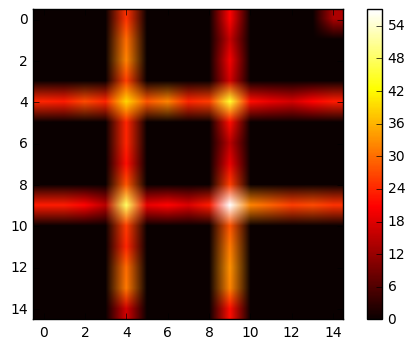

In [36]:
for t in range(100):
    grid = motion(carmap, lim=100)
plot(grid)

In [36]:
grid[:,:,0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  9.,  10.,  10.,   4.,   2.,   3.,   5.,   6.,   4.,  10.,   7.,
          5.,   2.,   5.,   8.],
       [ 10.,  10.,  10.,   5.,   2.,   4.,   6.,   7.,   5.,  10.,   8.,
          6.,   2.,   5.,   9.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  4.,   8.,   9.,   8.,   4.,   5.,   2.,   4.,   3.,   2.,   4.,
          8.,   5.,   5.,   3.],
       [  4.,   8.,   9.,   8.,   5.,